In [1]:
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse
import pandas as pd
import numpy as np
from pandas.tseries.offsets import Day, MonthEnd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
rng=pd.date_range('2000-01-01',periods=12,freq='T')
ts=pd.Series(np.arange(12),index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [3]:
ts.resample('5min',closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [4]:
ts.resample('5min',closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [5]:
ts.resample('5min',closed='right',label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [6]:
ts.resample('5min',closed='right',label='right',loffset='-1s').sum()

<ipython-input-6-3bc55b951048>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min',closed='right',label='right',loffset='-1s').sum()


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [7]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [8]:
ts.resample('5min', closed='right', label='right').count()

2000-01-01 00:00:00    1
2000-01-01 00:05:00    5
2000-01-01 00:10:00    5
2000-01-01 00:15:00    1
Freq: 5T, dtype: int64

In [9]:
ts.resample('5min', label='left').count()

2000-01-01 00:00:00    5
2000-01-01 00:05:00    5
2000-01-01 00:10:00    2
Freq: 5T, dtype: int64

In [10]:
frame=pd.DataFrame(np.random.randn(2,4),
                   index=pd.date_range('1/1/2000',periods=2,freq='W-WED'),
                   columns=['Colorado','Texas','New York','Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.233892,2.505206,-0.705807,-1.642488
2000-01-12,1.444095,1.356838,0.509362,-0.806865


In [11]:
df_daily=frame.resample('D').sum()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.233892,2.505206,-0.705807,-1.642488
2000-01-06,0.000000,0.000000,0.000000,0.000000
2000-01-07,0.000000,0.000000,0.000000,0.000000
2000-01-08,0.000000,0.000000,0.000000,0.000000
2000-01-09,0.000000,0.000000,0.000000,0.000000
2000-01-10,0.000000,0.000000,0.000000,0.000000
2000-01-11,0.000000,0.000000,0.000000,0.000000
2000-01-12,1.444095,1.356838,0.509362,-0.806865


In [12]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.233892,2.505206,-0.705807,-1.642488
2000-01-06,0.233892,2.505206,-0.705807,-1.642488
2000-01-07,0.233892,2.505206,-0.705807,-1.642488
2000-01-08,0.233892,2.505206,-0.705807,-1.642488
2000-01-09,0.233892,2.505206,-0.705807,-1.642488
2000-01-10,0.233892,2.505206,-0.705807,-1.642488
2000-01-11,0.233892,2.505206,-0.705807,-1.642488
2000-01-12,1.444095,1.356838,0.509362,-0.806865


In [13]:
g=frame.resample('D').ffill(limit=2)#.
g

,Colorado,Texas,New York,Ohio
2000-01-05,0.233892,2.505206,-0.705807,-1.642488
2000-01-06,0.233892,2.505206,-0.705807,-1.642488
2000-01-07,0.233892,2.505206,-0.705807,-1.642488
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.444095,1.356838,0.509362,-0.806865


In [14]:
g.fillna(g.mean(),limit=2).fillna(3)

,Colorado,Texas,New York,Ohio
2000-01-05,0.233892,2.505206,-0.705807,-1.642488
2000-01-06,0.233892,2.505206,-0.705807,-1.642488
2000-01-07,0.233892,2.505206,-0.705807,-1.642488
2000-01-08,0.536443,2.218114,-0.402015,-1.433582
2000-01-09,0.536443,2.218114,-0.402015,-1.433582
2000-01-10,3.000000,3.000000,3.000000,3.000000
2000-01-11,3.000000,3.000000,3.000000,3.000000
2000-01-12,1.444095,1.356838,0.509362,-0.806865


In [15]:
framere=pd.DataFrame(np.random.randn(24,4),
                     index=pd.period_range('2000-01','2001-12',freq='M'), 
                     columns=['Colorado','Texas','New York','Ohio'])
framere

,Colorado,Texas,New York,Ohio
2000-01,0.347847,-0.783888,-0.528898,-0.446196
2000-02,1.706603,1.147172,1.508793,1.430233
2000-03,1.357530,-1.540600,0.819518,0.562377
2000-04,-0.018793,0.302552,1.196537,-0.947946
2000-05,-0.946645,-0.966833,1.785667,0.666661
2000-06,0.196514,0.823445,-0.236049,-0.542802
2000-07,2.466383,-1.495445,-1.724361,0.551924
2000-08,-1.795349,-1.767087,-0.534491,0.716842
2000-09,1.111833,0.655442,2.251403,-0.132619
2000-10,1.781148,-0.477659,1.008351,-0.503646


In [16]:
framere.resample('Q-JAN').mean()

,Colorado,Texas,New York,Ohio
2000Q4,0.347847,-0.783888,-0.528898,-0.446196
2001Q1,1.015113,-0.030292,1.174949,0.348221
2001Q2,0.572084,-0.546278,-0.058248,0.225261
2001Q3,0.365877,-0.529768,0.908421,0.026859
2001Q4,-0.715782,-0.157498,0.905933,0.835100
2002Q1,0.463074,-0.134493,1.011325,-0.217847
2002Q2,0.668145,0.825132,-0.369177,-0.650805
2002Q3,0.276728,-0.127294,0.731804,-0.278014
2002Q4,0.100074,1.003668,0.464632,-0.531431


In [18]:
framere

,Colorado,Texas,New York,Ohio
2000-01,0.019524,1.238035,-0.065370,0.425397
2000-02,0.723043,-0.929298,-0.692632,-0.443381
2000-03,-0.491249,-0.354130,-1.123586,-0.037152
2000-04,0.830525,-0.045402,-0.324032,-0.242147
2000-05,1.381123,0.286862,0.623363,0.830133
2000-06,-1.007760,0.354348,-0.540784,0.946131
2000-07,-0.175918,-0.901911,0.105278,0.185794
2000-08,-0.102885,0.169916,-2.242049,-0.362745
2000-09,-1.191067,-0.006070,0.823694,-1.763627
2000-10,-1.136006,-1.332007,0.368906,0.453564


In [19]:
framere.resample('D').count()

,Colorado,Texas,New York,Ohio
2000-01-01,0.019524,1.238035,-0.06537,0.425397
2000-01-02,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN


In [20]:
number=36
fecha=pd.date_range('2000-01-01', freq='M',periods=number,name='fecha')
datos=pd.DataFrame(np.random.randn(number,6), index=fecha, 
                   columns=['A','B','C','D','E','F'])
datos

,A,B,C,D,E,F
fecha,,,,,,
2000-01-31,-2.198682,0.383447,-1.916041,-0.175973,-0.530260,-1.237831
2000-02-29,0.205645,0.738852,1.000489,-0.035315,-1.077932,-1.085026
2000-03-31,-0.124494,0.131606,1.479786,-1.478575,-0.356021,-2.549350
2000-04-30,-0.412593,-0.422819,0.080373,-0.811168,-1.169754,-0.445045
2000-05-31,-0.108355,0.539491,0.342075,1.376693,-0.575018,-1.229352
2000-06-30,-0.632890,0.547772,1.575060,-1.339943,-0.156846,0.448697
2000-07-31,-1.294540,-0.708630,0.394430,1.571288,-1.270415,0.234323
2000-08-31,-0.148312,0.225395,-0.595567,-0.607403,-1.608244,-0.193639
2000-09-30,-0.514822,-0.318698,0.066797,0.345674,0.550711,-0.453079


In [21]:
datos.columns.names=['Factor']

In [22]:
datos.resample('Q').sum()

Factor,A,B,C,D,E,F
fecha,,,,,,
2000-03-31,-2.117531,1.253905,0.564234,-1.689863,-1.964214,-4.872207
2000-06-30,-1.153838,0.664443,1.997507,-0.774418,-1.901618,-1.225700
2000-09-30,-1.957675,-0.801932,-0.134341,1.309558,-2.327948,-0.412395
2000-12-31,-0.886918,-2.756942,-0.010509,-1.865173,1.252226,0.840077
2001-03-31,-0.375524,-1.649984,-4.213198,2.553143,1.793840,1.699742
2001-06-30,0.466911,0.510172,-0.748577,4.451340,-4.568046,1.981492
2001-09-30,0.938456,-2.066615,0.412330,1.952082,-2.747686,1.207246
2001-12-31,1.327013,-0.923181,0.626502,-1.160046,-3.644537,2.571049
2002-03-31,-0.369608,-1.100183,-0.232321,-0.946239,-1.720207,0.641767


In [23]:
periodo=pd.to_datetime(datos.index)
periodo

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31', '2000-11-30', '2000-12-31',
               '2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31', '2001-11-30', '2001-12-31',
               '2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31', '2002-11-30', '2002-12-31'],
              dtype='datetime64[ns]', name='fecha', freq='M')

In [24]:
for i in datos:
    datos['G']=(datos['A']+datos['B'])-(((datos['C']*datos['D']))
                                        **(np.log(number)))

In [25]:
print(datos)

Factor             A         B         C         D         E         F  \
fecha                                                                    
2000-01-31 -2.198682  0.383447 -1.916041 -0.175973 -0.530260 -1.237831   
2000-02-29  0.205645  0.738852  1.000489 -0.035315 -1.077932 -1.085026   
2000-03-31 -0.124494  0.131606  1.479786 -1.478575 -0.356021 -2.549350   
2000-04-30 -0.412593 -0.422819  0.080373 -0.811168 -1.169754 -0.445045   
2000-05-31 -0.108355  0.539491  0.342075  1.376693 -0.575018 -1.229352   
2000-06-30 -0.632890  0.547772  1.575060 -1.339943 -0.156846  0.448697   
2000-07-31 -1.294540 -0.708630  0.394430  1.571288 -1.270415  0.234323   
2000-08-31 -0.148312  0.225395 -0.595567 -0.607403 -1.608244 -0.193639   
2000-09-30 -0.514822 -0.318698  0.066797  0.345674  0.550711 -0.453079   
2000-10-31 -0.149153  0.629923 -0.350826 -0.796164  1.302926  0.494678   
2000-11-30 -0.043140 -1.197066  0.133568 -0.193252  0.083638 -1.062393   
2000-12-31 -0.694624 -2.189798  0.2067

Text(0, 0.5, 'factor G')

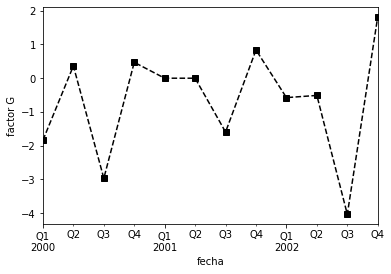

In [30]:
gh=datos.dropna()
gh['G'].dropna().resample('Q-DEC').sum().plot(label='factor G',color='k', 
                                              linestyle='--', marker='s')
plt.ylabel('factor G')

In [31]:
len(gh)

14

Text(0, 0.5, 'Factor G')

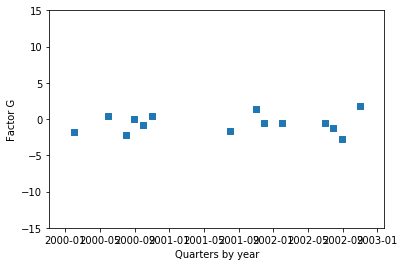

In [28]:
plt.scatter(datos.index,datos['G'], marker='s')
plt.ylim(-15,15)
plt.xlabel('Quarters by year')
plt.xticks()
plt.ylabel('Factor G')

In [29]:
len(datos.dropna())

14